# Exploratory Data Analysis on Netflix Movies & TV Shows
 #### By Mayank Prajapati
Netflix is a popular service that people across the world use for entertainment. In this EDA, I will explore the netflix-shows dataset through visualizations and graphs using matplotlib and seaborn.

## Introduction
In this EDA, we will work with a Netflix dataset that consists of 6,234 entries and 12 columns. This dataset provides valuable information about various shows available on a streaming platform. Let's take a closer look at the dataset:

- **show_id**: An identification number for each show.
- **type**: Indicates whether the show is a movie or a TV show.
- **title**: The title or name of the show.
- **director**: The director(s) of the show (contains some missing values).
- **cast**: The cast or actors in the show (contains some missing values).
- **country**: The country or countries associated with the show (contains some missing values).
- **date_added**: The date when the show was added to the streaming platform (contains a few missing values).
- **release_year**: The year when the show was originally released.
- **rating**: The content rating of the show (contains a few missing values).
- **duration**: The duration of the show, which can be in various formats (e.g., minutes, seasons).
- **listed_in**: Categories or genres in which the show is listed.
- **description**: A brief description or summary of the show.

As we begin our EDA journey,we'll explore various aspects of this dataset to uncover insights, trends, and patterns that can help us better understand the content available on the Netflix platform. Let's dive into the data and discover what it has to offer!


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

## Loading the Dataset

In [2]:
netflix_titles_df = pd.read_csv('netflix_titles.csv')
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


After a quick glimpse at the dataset, it looks like a typical movies/shows dataset without user ratings. We can also see that there are NaN values in some columns.

## Data Preparation and Cleaning

In [3]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


There are 6,234 entries and 12 columns to work with for EDA. Right off the bat, there are a few columns that contain null values ('director', 'cast', 'country', 'date_added', 'rating').

In [4]:
netflix_titles_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

## Handling Null Values
We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well.

In [5]:
netflix_titles_df.isnull().values.any()

True

In [6]:
netflix_titles_df.isnull().sum().sum()

3036

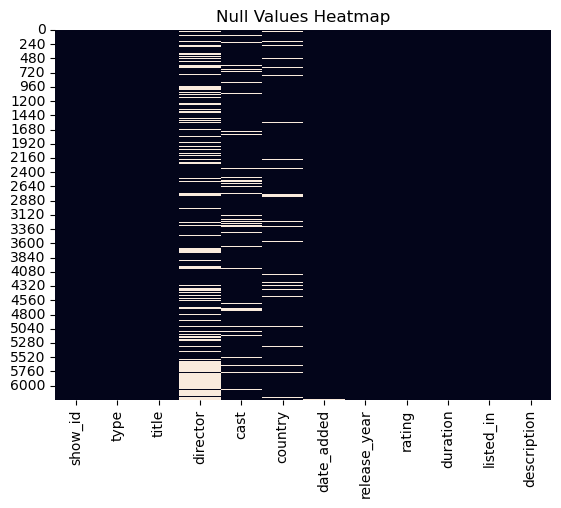

In [7]:
sns.heatmap(netflix_titles_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [8]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Above in the heatmap and table, we can see that there are quite a few null values in the dataset. There are a total of 3,036 null values across the entire dataset with 1,969 missing points under 'director', 570 under 'cast', 476 under 'country', 11 under 'date_added', and 10 under 'rating'. We will have to handle all null data points before we can dive into EDA and modeling.

In [9]:
netflix_titles_df['director'].fillna('No Director', inplace=True)
netflix_titles_df['cast'].fillna('No Cast', inplace=True)
netflix_titles_df['country'].fillna('Country Unavailable', inplace=True)
netflix_titles_df.dropna(subset=['date_added','rating'],inplace=True)

In [10]:
netflix_titles_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. Since 'director', 'cast', and 'country' contain the majority of null values, I will choose to treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so I will drop them from the dataset. After, we can see that there are no more null values in the dataset.

## Splitting the Dataset
Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [11]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [12]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type']=='TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country Unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


## Data Preparation
In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. To make EDA easier, I will convert the values in these columns into integers for both the movies and shows datasets.

In [13]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min','').astype(int)
netflix_shows_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons','').astype(int)

# Exploratory Analysis and Visualization
First we will begin analysis on the entire Netflix dataset consisting of both movies and shows. Revisiting the data, let us see how it looked like again.

In [14]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Netflix Film Types: Movie or TV Show
It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

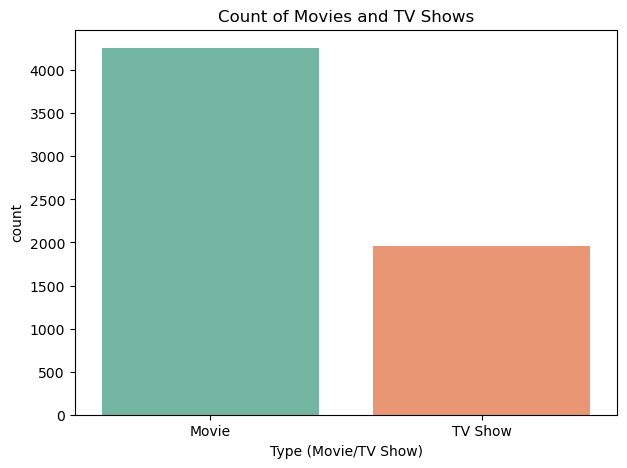

In [15]:
plt.figure(figsize=(7, 5))
# Change the palette to a different built-in one (e.g., "Set2")
g = sns.countplot(data=netflix_titles_df, x='type', palette='Set2')
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")

plt.show()

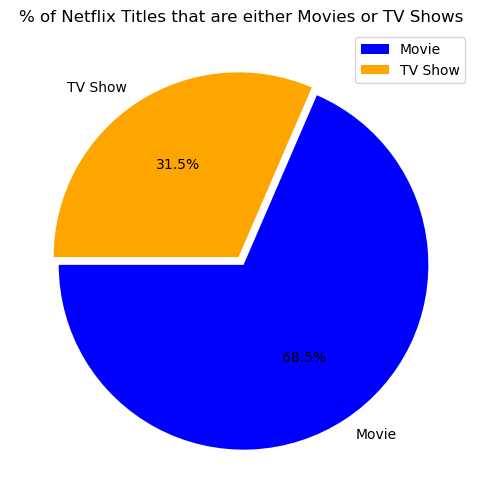

In [16]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_titles_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_titles_df.type.value_counts().index, colors=['blue','orange'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

So there are roughly 4,000+ movies and almost 2,000 shows with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out as the majority. However, in terms of title, there are far more movie titles (68.5%) than TV show titles (31.5%).

## Netflix Film Ratings
Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest. We will not include the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

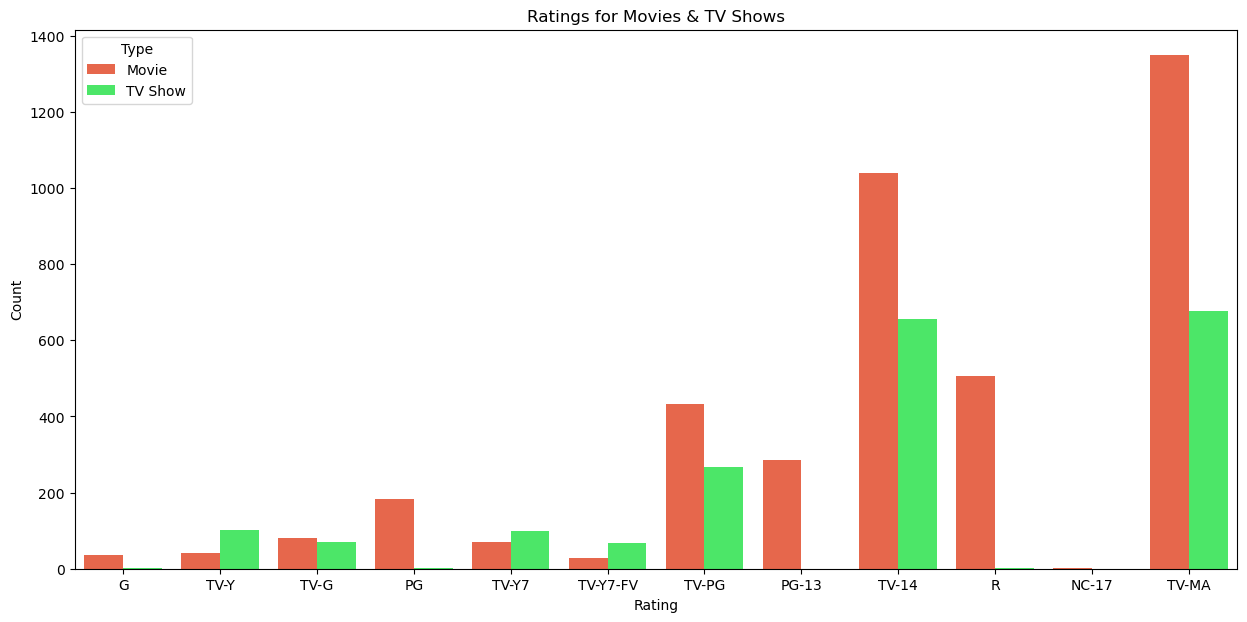

In [17]:
# Specify the order of ratings
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# Define a custom color palette
custom_palette = ["#FF5733", "#33FF57"]  # Replace these with your desired colors

plt.figure(figsize=(15, 7))
g = sns.countplot(data=netflix_titles_df, x='rating', hue='type', order=order, palette=custom_palette)
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title='Type')

plt.show()

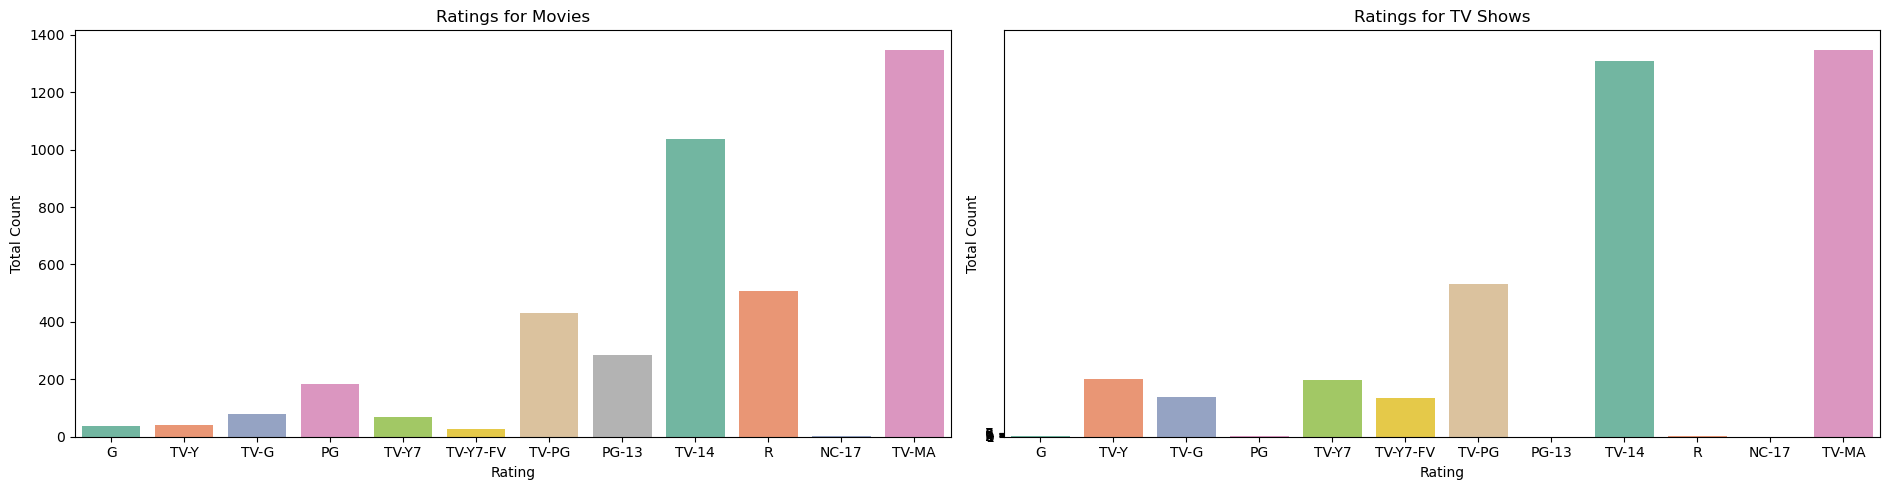

In [18]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(19, 5))

# Plot for Movies
g1 = sns.countplot(data=netflix_movies_df, x='rating', order=order, palette="Set2", ax=ax[0])
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")

# Plot for TV Shows
g2 = sns.countplot(data=netflix_shows_df, x='rating', order=order, palette="Set2", ax=ax[1])
g2.set(yticks=np.arange(0, 8, 1))  # Adjust y-axis ticks as needed
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

Overall, there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.

In [19]:
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

## Content added each year
Now we will take a look at the amount content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a 'year_added' column shows the year of the date from the 'date_added' column as shown above.

In [20]:
netflix_year = netflix_titles_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
5,2015,88
6,2014,25
7,2011,13
8,2013,12
9,2012,7
10,2009,2


In [21]:
netflix_year2 = netflix_titles_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

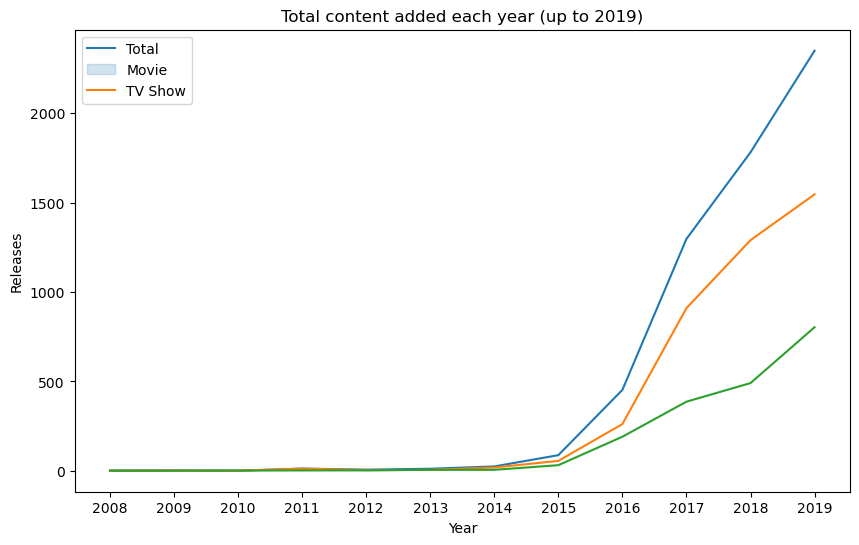

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. I decided to exclude content added during 2020 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows.

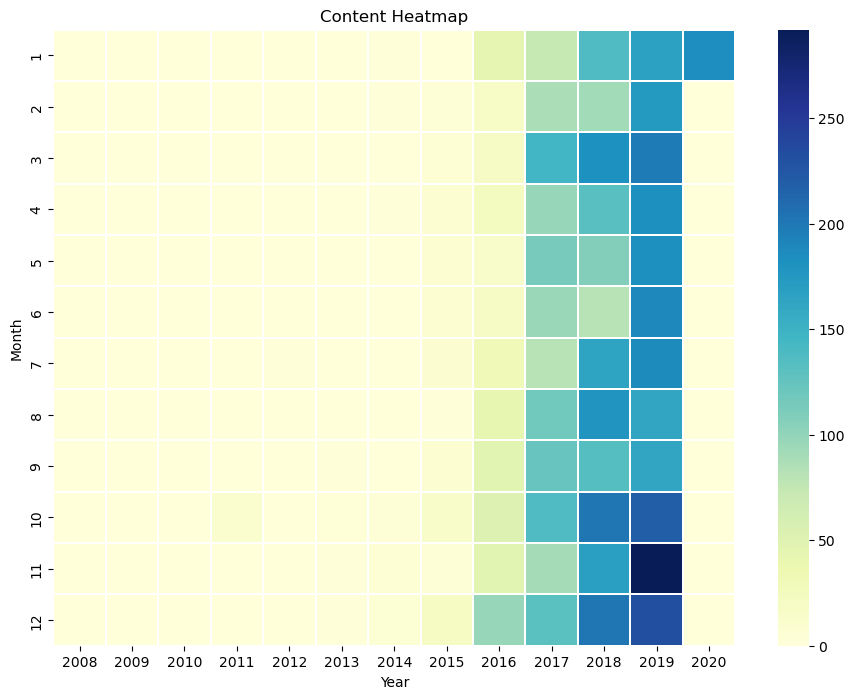

In [23]:
month_year_df = netflix_titles_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the above heatmap, we can see that around 2014 is when Netflix began to increase their content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2020, the data stops at January since that is the latest month available in the dataset.

## Netflix Film Duration

C:\Users\dell\AppData\Local\Temp\ipykernel_2528\3532408837.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(netflix_movies_df.duration, color='skyblue',ax=ax[0]);


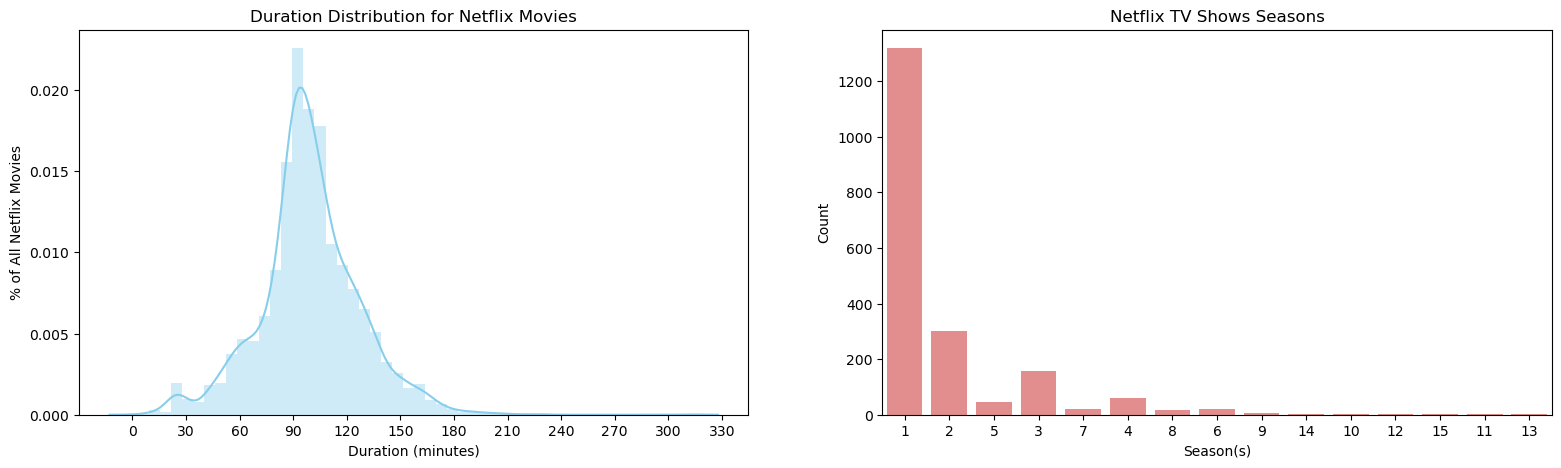

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(19, 5))

# Plot a distribution plot for movie duration
g1 = sns.distplot(netflix_movies_df.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")

# Plot a countplot for TV show seasons
g2 = sns.countplot(data=netflix_shows_df, x='seasons', color='lightcoral', ax=ax[1], order=netflix_shows_df['seasons'].unique())
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")

plt.show()


Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

## Countries with the most content available

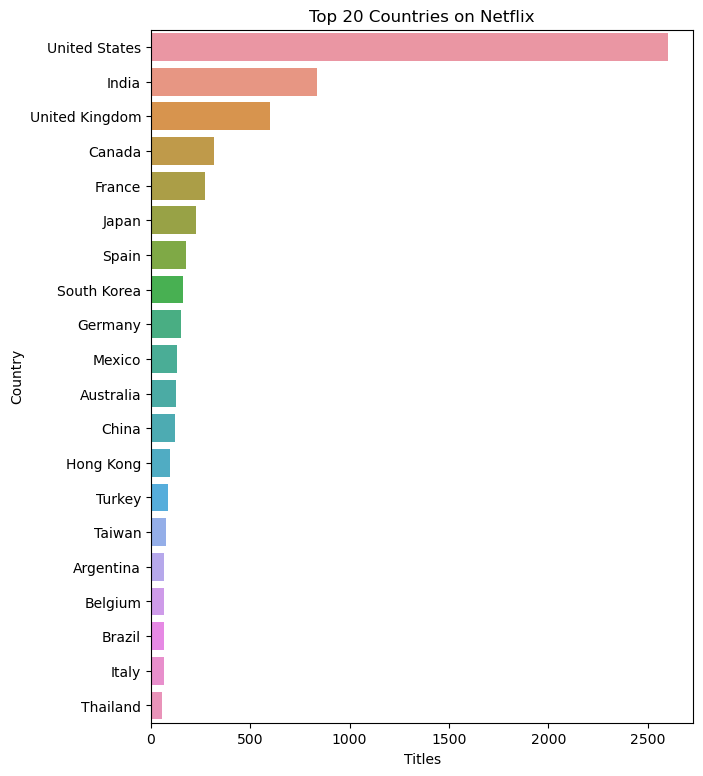

In [25]:
filtered_countries = netflix_titles_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countries as shown in the original dataset. Therefore, we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we can plot a Top 20 list to see which countries have the highest availability of films on Netflix. Unsurprisingly, the United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it has about 18% of the world's population. Reasons for this could be for political reasons and the banning of certain applications which isn't uncommon between the United States and China.

## Popular Genres

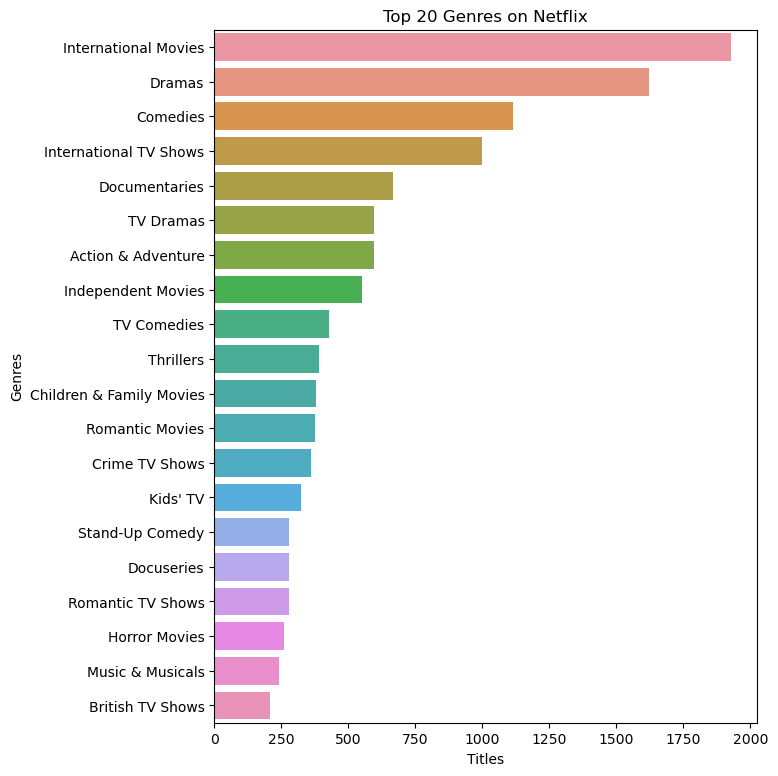

In [26]:
filtered_genres = netflix_titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

### Who are the top 10 directors on Netflix with the most releases?

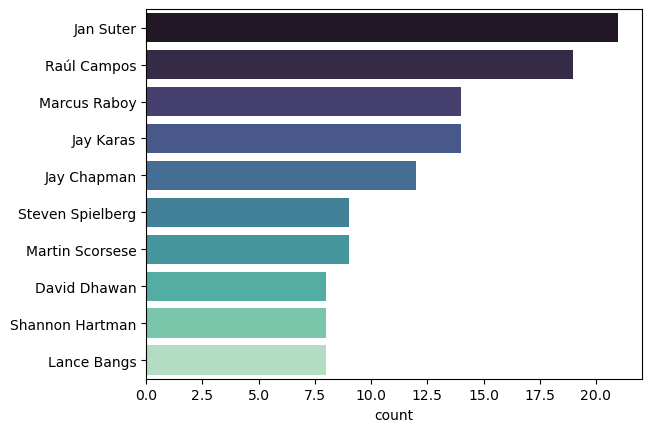

In [27]:
filtered_directors = netflix_titles_df[netflix_titles_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()

As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

### Who are the top 10 actors on Netflix based on number of titles?

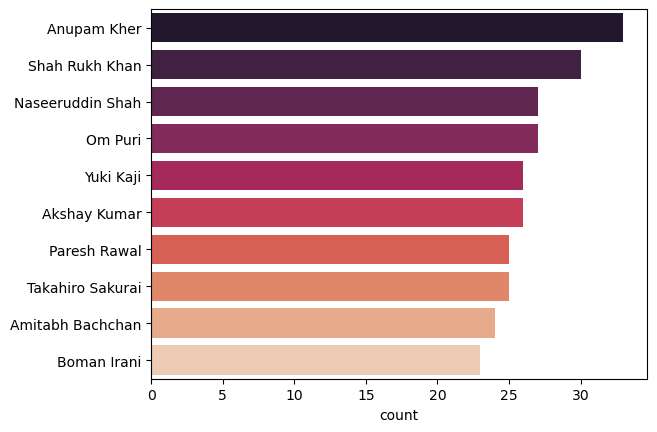

In [28]:
filtered_cast = netflix_titles_df[netflix_titles_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

In this list, we can see that the most popular actors on Netflix based on the number of titles are all national-international as well. This reinforces the sentiment that the majority of Netflix subscribers are from india.

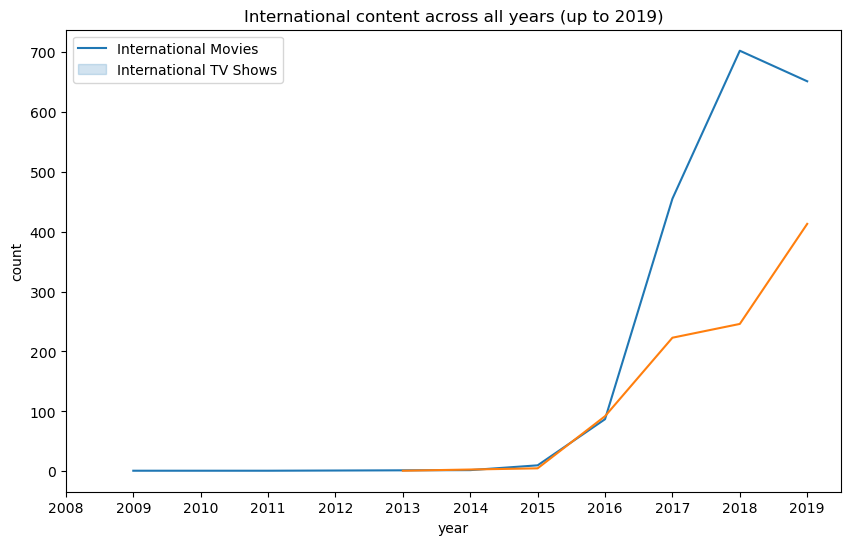

In [29]:
international_movies = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2020]

international_shows = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2020]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

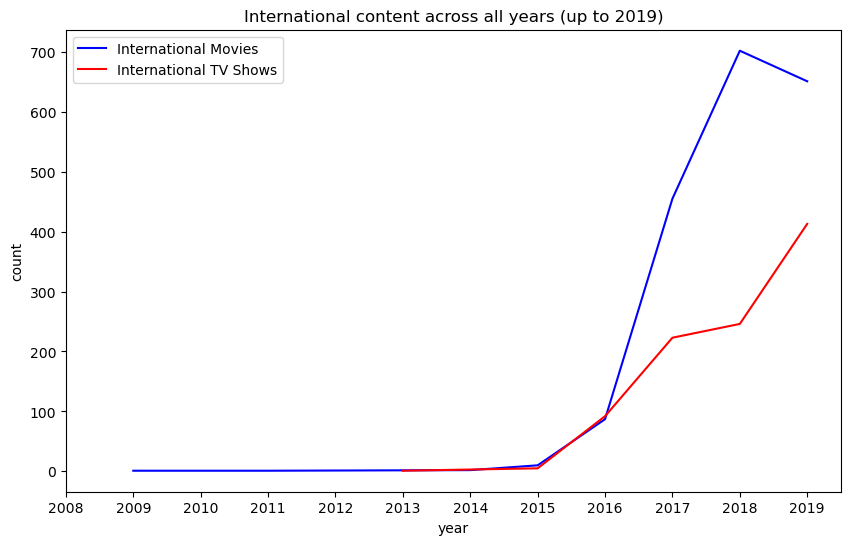

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define custom colors for the lines
line_colors = ['blue', 'red']

# Plot the lines with custom colors
sns.lineplot(data=intmov_year, x='year', y='count', color=line_colors[0], label='International Movies')
sns.lineplot(data=intshow_year, x='year', y='count', color=line_colors[1], label='International TV Shows')

ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend()
plt.show()


Based on the timeline, we can see that there are far more international movie releases than there are international tv show releases. However, near 2018, the growth of international movies started to decline while international tv shows constantly showed significant growth in the past few years.

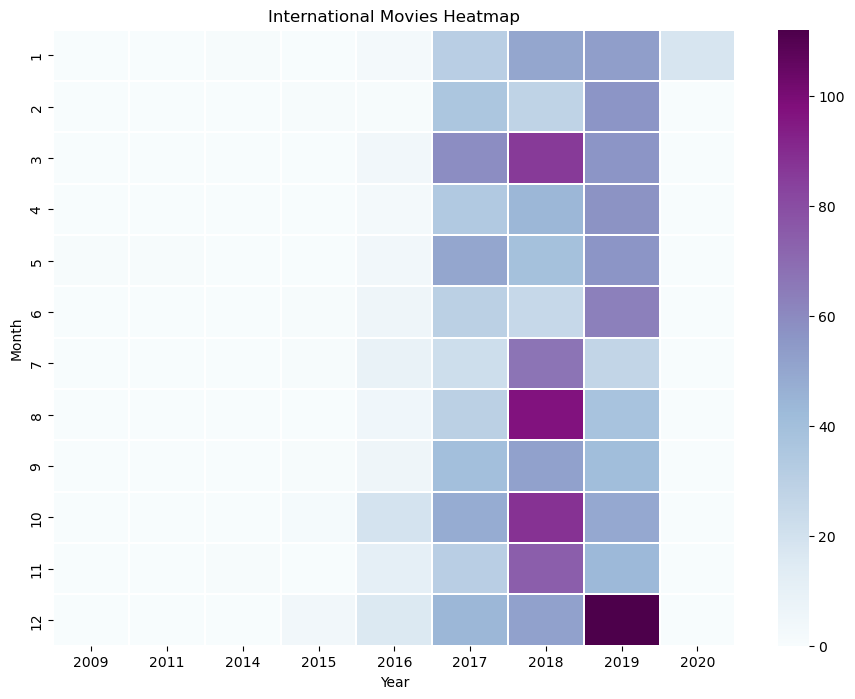

In [31]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the heatmap above, we can see that a majority of international movies were added throughout the year in 2018. Then in December 2019, Netflix added the most international movie content

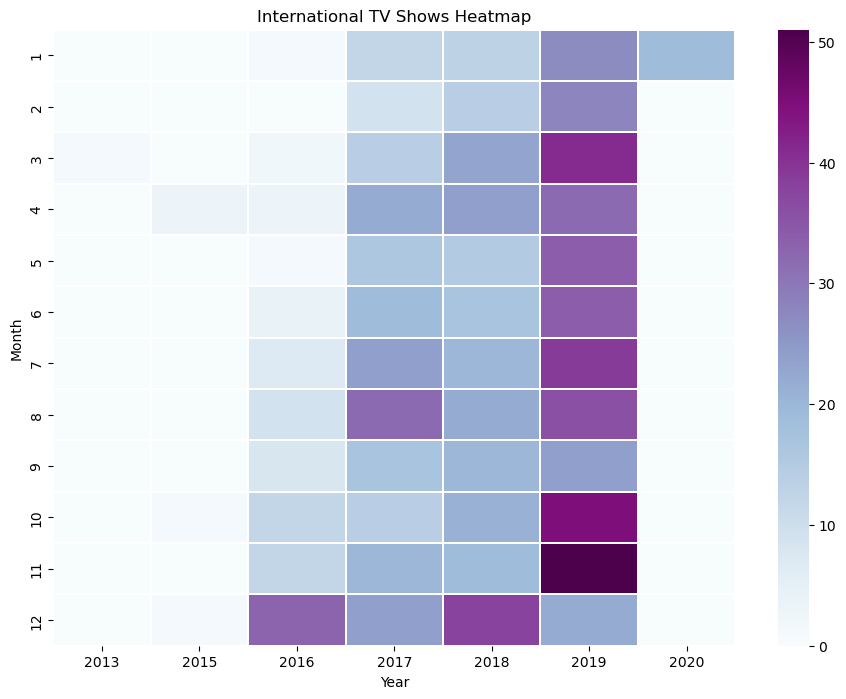

In [32]:
intsho_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intsho_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the above heatmap, we can see that the majority of international TV shows were added throughout the year 2019.



## Conclusion
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

### Now we have come to the end of this project